<a href="https://colab.research.google.com/github/Hoang-icy/fun-tias-java/blob/master/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab\ Notebooks/CW2/Face
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/CW2/Face
 Duc    Hieu   Kien   model.h5	 Tan	 Truong   Van	     'Xuan Anh'
 HDuc   Hung   Linh   Quan	 Thang	 Tuan	 'Viet Duc'


In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 14.9MB/s 


In [ ]:
from mtcnn import MTCNN
import cv2
import os

detector = MTCNN()
files = os.listdir()

for file in files:
  image = cv2.imread(file)
  if image is not None:
    result = detector.detect_faces(image)
    if len(result):
      x, y, w, h = result[0]['box']
      x0, y0 = x + w//2, y + h//2 #center
      if y0 > 180:
        roi = image[y0-180:y0+180, x0-180:x0+180]
      else:
        roi = image[0:360, x0-180:x0+180]
      cv2.imwrite( file , roi)



In [ ]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

In [ ]:
from skimage.transform import resize

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def load_faces(directory=None):
  list_image = list()

  for filename in listdir(directory):
    path = (directory + '/' if directory else '') + filename
    
    image = plt.imread(path)
    resized = resize(image, (160, 160),mode='reflect')
    image = img_to_array(resized)

    # to dims = 4
    image = np.expand_dims(image, 0)

    list_image.append(image)

  list_image = np.vstack(list_image)
  return list_image


In [ ]:
id = listdir()

In [ ]:
id

['Xuan Anh',
 'Duc',
 'HDuc',
 'Hieu',
 'Hung',
 'Kien',
 'Linh',
 'Quan',
 'Tan',
 'Thang',
 'Tuan',
 'Van',
 'Truong',
 'Viet Duc']

In [ ]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for i, subdir in enumerate(listdir(directory)):
		# skip any files that might be in the dir
		if not isdir(subdir):
			continue
		# load all faces in the subdirectory
		faces = load_faces(subdir)
		# create labels
		labels = [ i for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [ ]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray

In [ ]:
X, y = load_dataset(None)

>loaded 31 examples for class: Xuan Anh
>loaded 39 examples for class: Duc
>loaded 33 examples for class: HDuc
>loaded 39 examples for class: Hieu
>loaded 30 examples for class: Hung
>loaded 23 examples for class: Kien
>loaded 24 examples for class: Linh
>loaded 18 examples for class: Quan
>loaded 13 examples for class: Tan
>loaded 19 examples for class: Thang
>loaded 28 examples for class: Tuan
>loaded 19 examples for class: Van
>loaded 28 examples for class: Truong
>loaded 21 examples for class: Viet Duc


In [ ]:
X[0].shape

(160, 160, 3)

In [ ]:
import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, Input, Flatten, GlobalAveragePooling2D, BatchNormalization, Add
from keras.models import Model, Sequential,load_model
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from skimage.transform import resize

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [ ]:
y = to_categorical(y, 14)

In [ ]:
st = StratifiedShuffleSplit(n_splits = 2, test_size = 0.1, random_state = 1)

for train_index, test_index in st.split(X, y): 
     X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

In [ ]:
print("The number of training/validation data : ", X_train.shape[0])
print("The number of testing data : ", X_test.shape[0])

The number of training/validation data :  328
The number of testing data :  37


In [ ]:
st = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 1)
for train_index, val_index in st.split(X_train, y_train):
    X_train, X_val, y_train, y_val = X[train_index], X[val_index], y[train_index], y[val_index]
    
print("The number of training data : ", X_train.shape[0])
print("The number of validation data : ", X_val.shape[0])

The number of training data :  262
The number of validation data :  66


In [ ]:
# augmentation cho training data
aug_train = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [ ]:
face_net = load_model('../facenet_keras.h5')
face_net.load_weights('../facenet_keras_weights.h5')

In [ ]:
model = Sequential()
model.add(face_net)
model.add(Dropout(0.3))
model.add(Dense(14, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.0001)))
model.compile(loss= 'categorical_crossentropy',
              optimizer= SGD(momentum =0.9),
              metrics= 'accuracy')

In [ ]:
rlrop = ReduceLROnPlateau(monitor = 'val_accuracy',
                          patience = 2,
                          mode='max',
                          factor = 0.3,
                          min_lr = 1e-9,
                          verbose = 1)

filepath = '../model.h5'
mdcp = ModelCheckpoint(filepath,
                        monitor='val_accuracy',
                        save_best_only=True,
                        verbose=1)

callbacks = [rlrop, mdcp]

In [ ]:
face_net.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v1 (Functio (None, 128)               22808144  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                1806      
Total params: 22,809,950
Trainable params: 1,806
Non-trainable params: 22,808,144
_________________________________________________________________


In [ ]:
H = model.fit(aug_train.flow(X_train, y_train, batch_size=8),
              steps_per_epoch=len(X_train)//8,
              validation_data=(X_val, y_val),
              callbacks=callbacks,
              epochs=20,
              verbose=1)

model.save_weights("../weight.h5")

Epoch 1/20
32/32 [==============================] - 8s 116ms/step - loss: 0.0604 - accuracy: 0.9882 - val_loss: 0.0547 - val_accuracy: 0.9848

Epoch 00001: val_accuracy did not improve from 0.98485
Epoch 2/20
32/32 [==============================] - 2s 66ms/step - loss: 0.0719 - accuracy: 0.9764 - val_loss: 0.0537 - val_accuracy: 0.9848

Epoch 00002: val_accuracy did not improve from 0.98485
Epoch 3/20
32/32 [==============================] - 2s 67ms/step - loss: 0.0397 - accuracy: 0.9961 - val_loss: 0.0538 - val_accuracy: 0.9848

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-05.

Epoch 00003: val_accuracy did not improve from 0.98485
Epoch 4/20
32/32 [==============================] - 2s 66ms/step - loss: 0.1020 - accuracy: 0.9646 - val_loss: 0.0538 - val_accuracy: 0.9848

Epoch 00004: val_accuracy did not improve from 0.98485
Epoch 5/20
32/32 [==============================] - 3s 79ms/step - loss: 0.0533 - accuracy: 0.9882 - val_loss: 0.0539 - val_accura

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
def indexOfMax(y):
  max, index = 0, -1 
  for i, n in enumerate(y):
    if n > max:
      max, index = n, i  
  return max, index

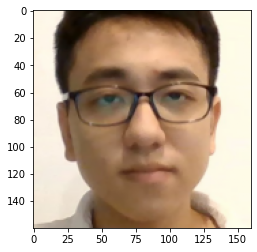

Xuan Anh


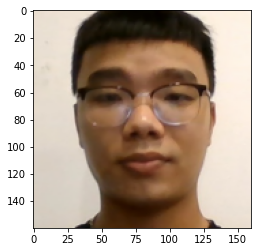

Tuan


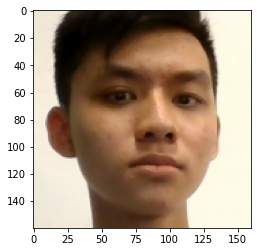

Duc


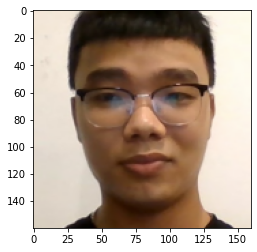

Tuan


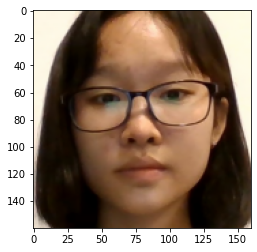

Van


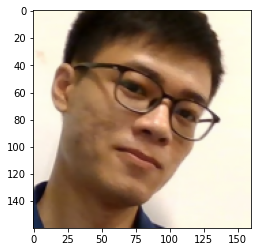

Thang


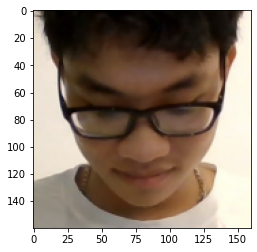

Xuan Anh


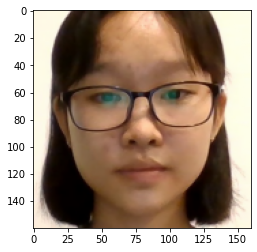

Van


In [ ]:
result = []

for i in range(8):
  plt.imshow(X_test[i])
  plt.show()
  max, index = indexOfMax(y_hat[i])
  if(max > 0.6):
    print(id[index])
  else:
    print('Unknown')

In [ ]:
model0 = load_model('../model.h5')
model0.load_weights('../weight.h5')

#Hàm check attendance nhận parameter là test set

In [ ]:
from mtcnn import MTCNN
import cv2
import os

detector = MTCNN()

def check_attendance(directory):
  files = os.listdir(directory)
  print(files)
  for file in files:
    image = cv2.imread(file)
    if image is not None:
      result = detector.detect_faces(image)
      if len(result):
        x, y, w, h = result[0]['box']
        x0, y0 = x + w//2, y + h//2 #center
        if y0 > 180:
          roi = image[y0-180:y0+180, x0-180:x0+180]
        else:
          roi = image[0:360, x0-180:x0+180]
  
        cv2.imwrite( file , roi)
        print(file)

  test_faces = load_faces(directory)
  y_predict = model0.predict(test_faces)

  names = []
  for y in y_predict:
    max, index = indexOfMax(y)
    if(max > 0.7):
      names.append(id[index])
    else:
      names.append('Unknown')
  return names

In [ ]:
check_attendance('../Test')

['Kien13.jpg', 'Duc14.jpg']


['Kien', 'Unknown']